In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,Lambda
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D,UpSampling2D,Concatenate,Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.callbacks import LearningRateScheduler,Callback
from keras.optimizers import RMSprop
import glob
import cv2
import os
from math import *
from keras.applications.vgg16 import VGG16 
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py
from keras.utils import to_categorical
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from keras.preprocessing.image import ImageDataGenerator
from skimage import measure
from skimage.transform import rotate
from imutils import contours
import imutils
%matplotlib inline

In [2]:
imgs_gt =[]
imgs_o = []
count_gt = 0
count_o = 0
for j in range(10):
    #print(j + 1)
    img_cnt = str(j + 1)
    img_path_gt = 'Images_for_FCRN/Random/img' + img_cnt + '/gt'
    img_path_o = 'Images_for_FCRN/Random/img' + img_cnt + '/o'
    for i in range((len(os.listdir(img_path_gt)))):
        cnt = str(i + 1)
        path_gt = img_path_gt + '/img' + img_cnt + '_' + cnt + 'gt.jpg'
        img_gt = cv2.imread(path_gt)
        img_gt = cv2.cvtColor(img_gt,cv2.COLOR_RGB2GRAY)
        if img_gt.shape == (224,224):
            imgs_gt.append(img_gt)
            count_gt = count_gt + 1
        path_o = img_path_o + '/img' + img_cnt + '_' + cnt + 'o.jpg'
        img_o = cv2.imread(path_o)
        if img_o.shape == (224,224,3):
            imgs_o.append(img_o)
            count_o = count_o + 1
print(count_gt,' ',count_o)
imgs_gt = np.asarray(imgs_gt)
imgs_gt = imgs_gt.reshape((3477,224,224,1))
imgs_o = np.asarray(imgs_o)
print(imgs_gt.shape)
print(imgs_o.shape)


3477   3477
(3477, 224, 224, 1)
(3477, 224, 224, 3)


In [39]:
# Scikit-Image. 'angle' = Degrees. 'img' = Input Image
# For details about 'mode', checkout the interpolation section below.
rot_o = rotate(imgs_o[0], angle=90)

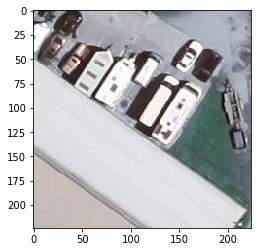

In [40]:
plt.imshow(imgs_o[0],vmin=0,vmax=255)

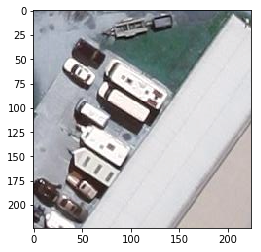

In [41]:
plt.imshow(rot_o,vmin=0,vmax=255)

In [29]:
rot_gt = rotate(imgs_gt[0].reshape(224,224), angle=45, mode='reflect')

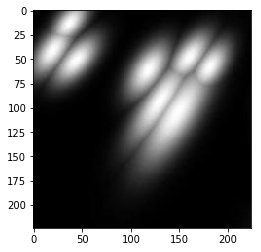

In [33]:
#imgs_gt = np.asarray(imgs_gt)
#print(imgs_gt.shape)
#imgs_gt.reshape((3477,224,224))
#print(imgs_gt.shape)
plt.imshow(imgs_gt[0].reshape(224,224),cmap = 'gray',vmin=0,vmax=255)

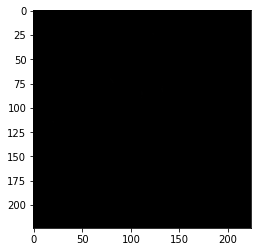

In [34]:
plt.imshow(rot_gt,cmap = 'gray',vmin=0,vmax=255)